In [101]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [105]:
dataset_name = 'real_estate'


additional_taxonomy = None


if dataset_name == 'adult':
    from import_process_dataset import import_process_adult, train_classifier_kv

    df, class_map, continuous_attributes = import_process_adult()

    df_analyze = train_classifier_kv(df, encoding = True)
elif dataset_name == 'real_estate':
    from import_process_dataset import import_process_real_estate

    df_analyze, target, continuous_attributes = import_process_real_estate()
    
    
elif dataset_name == 'default_payment':
    from import_process_dataset import import_process_default_payment


    df_analyze, target, continuous_attributes = import_process_default_payment()
    
    
elif dataset_name == 'wine':
    from import_process_dataset import import_process_wine, train_classifier_kv

    df, class_map, continuous_attributes = import_process_wine()
    # # Train and predict with RF classifier

    df_analyze = train_classifier_kv(df)
    
elif dataset_name == 'online_shoppers_intention':
    from import_process_dataset import import_process_online_shoppers_intention, train_classifier_kv

    df, class_map, continuous_attributes = import_process_online_shoppers_intention()
    # # Train and predict with RF classifier

    df_analyze = train_classifier_kv(df, encoding=True)
    
elif dataset_name == "folkstables":
        from import_process_dataset import import_folkstables

        (
            df_analyze,
            target,
            continuous_attributes,
        ) = import_folkstables()

        import json
        import os

        with open(
            os.path.join(
                os.path.curdir, "datasets", "ACSPUMS", "adult_taxonomies.json"
            ),
            "r",
        ) as fp:
            additional_taxonomy = json.load(fp)

In [106]:
# # Tree divergence

true_class_name = "class"
pred_class_name = "predicted"
cols_c = [true_class_name, pred_class_name]
metric = 'd_outcome'


type_criterion="divergence_criterion"
type_experiment = "one_at_time"
min_support_tree = 0.1

import time

for i in range(5):
    start_time = time.time()
    if metric == 'd_outcome':
        from tree_discretization_ranking import TreeDiscretization_ranking

        tree_discr = TreeDiscretization_ranking()

        # ## Extract tree
        generalization_dict, discretizations = tree_discr.get_tree_discretization(
            df_analyze,
            type_splitting=type_experiment,
            min_support=min_support_tree,
            metric=metric,
            continuous_attributes=list(continuous_attributes),
            type_criterion=type_criterion,
            storeTree=True,
            target_col=target
        )
    else:
        from tree_discretization import TreeDiscretization

        tree_discr = TreeDiscretization()

        # ## Extract tree
        generalization_dict, discretizations = tree_discr.get_tree_discretization(
            df_analyze,
            type_splitting=type_experiment,
            min_support=min_support_tree,
            metric=metric,
            class_map=class_map,
            continuous_attributes=list(continuous_attributes),
            class_and_pred_names=cols_c,
            storeTree=True,
            type_criterion=type_criterion
        )

    print(time.time()-start_time)

0.15633511543273926
0.15197277069091797
0.15203213691711426
0.15155029296875
0.15280961990356445


In [107]:
tree_discr.printDiscretizationTrees(round_v = 2)

YearBuilt
 root s=1.00 --> d_outcome=0.00
         YearBuilt<=2005 s=0.43 --> d_outcome=-72504.02
                 YearBuilt<=1992 s=0.17 --> d_outcome=-88578.96
                 YearBuilt>=1993 s=0.26 --> d_outcome=-62170.13
                         YearBuilt<=2003 s=0.13 --> d_outcome=-69460.66
                         YearBuilt>=2005 s=0.13 --> d_outcome=-54365.20
         YearBuilt>=2006 s=0.57 --> d_outcome=53713.82
                 YearBuilt<=2007 s=0.32 --> d_outcome=81196.18
                         YearBuilt<=2006 s=0.11 --> d_outcome=28591.48
                         YearBuilt>=2007 s=0.21 --> d_outcome=109753.01
                 YearBuilt>=2008 s=0.25 --> d_outcome=18947.00

YrSold
 root s=1.00 --> d_outcome=0.00
         YrSold<=2012 s=0.46 --> d_outcome=-40559.76
                 YrSold<=2010 s=0.28 --> d_outcome=-47868.02
                         YrSold<=2009 s=0.18 --> d_outcome=-32605.29
                         YrSold>=2010 s=0.11 --> d_outcome=-73000.96
              

In [108]:
if additional_taxonomy is not None:
    generalization_dict.update(additional_taxonomy)

In [109]:
df_analyze.shape, len(continuous_attributes)

((5891, 30), 23)

In [110]:
categorical = [i for i in list(df_analyze.columns) if i not in continuous_attributes and i!=target]
df_analyze[categorical]

,HallwayType,HeatingType,AptManageType,TimeToBusStop,TimeToSubway,SubwayStation
0,terraced,individual_heating,management_in_trust,5min~10min,10min~15min,Kyungbuk_uni_hospital
1,corridor,individual_heating,self_management,0~5min,5min~10min,Daegu
2,corridor,individual_heating,self_management,0~5min,5min~10min,Daegu
3,terraced,individual_heating,management_in_trust,0~5min,0-5min,Sin-nam
4,mixed,individual_heating,management_in_trust,0~5min,15min~20min,Myung-duk
...,...,...,...,...,...,...
5886,terraced,individual_heating,management_in_trust,0~5min,0-5min,Kyungbuk_uni_hospital
5887,terraced,individual_heating,management_in_trust,5min~10min,0-5min,Myung-duk
5888,terraced,individual_heating,management_in_trust,0~5min,0-5min,Kyungbuk_uni_hospital
5889,corridor,individual_heating,self_management,0~5min,0-5min,Kyungbuk_uni_hospital


In [111]:
for c in continuous_attributes:
    print(c, len(df_analyze[c].value_counts()))

YearBuilt 16
YrSold 11
MonthSold 12
Size(sqf) 92
Floor 43
N_Parkinglot(Ground) 23
N_Parkinglot(Basement) 20
N_APT 9
N_manager 9
N_elevators 13
N_FacilitiesNearBy(PublicOffice) 8
N_FacilitiesNearBy(Hospital) 3
N_FacilitiesNearBy(Dpartmentstore) 3
N_FacilitiesNearBy(Mall) 3
N_FacilitiesNearBy(ETC) 4
N_FacilitiesNearBy(Park) 3
N_SchoolNearBy(Elementary) 5
N_SchoolNearBy(Middle) 5
N_SchoolNearBy(High) 6
N_SchoolNearBy(University) 6
N_FacilitiesInApt 9
N_FacilitiesNearBy(Total) 11
N_SchoolNearBy(Total) 14


In [112]:

out_support = {}
out_time = {}
out_fp = {}





In [113]:
min_sup_divergences = [0.05]
#min_sup_divergences = [0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.075, 0.1, 0.15, 0.2]




In [86]:
# # Extract patterns


output_divergences = {}

import time

for apply_generalization in [False, True]:
    type_gen = 'generalized' if apply_generalization else 'base'
    print(type_gen)
    for top_k in [1000]: #None, 
        top_k_str = '' if top_k is None else f'_top_{top_k}'
        print(top_k_str)
        for keep in [True]: #False
            if keep:
                keep_items = tree_discr.get_keep_items_associated_with_divergence()
                keep_str = "_pruned"
            else:
                keep_items = None
                keep_str = ""
            print(keep_str)
            for min_sup_divergence in min_sup_divergences:
                print(min_sup_divergence, end = " ")
                s_time = time.time()

                if metric == 'd_outcome':
                    from utils_extract_divergence_generalized_ranking import  extract_divergence_generalized

                    FP_fm = extract_divergence_generalized(
                    df_analyze,
                    discretizations,
                    generalization_dict,
                    continuous_attributes,
                    min_sup_divergence=min_sup_divergence,
                    apply_generalization=apply_generalization,
                    target_name=target,
                    metrics_divergence = [metric],
                    FPM_type="fpgrowth",
                    save_in_progress = False, 
                    keep_only_positive_divergent_items=keep_items,
                    take_top_k=top_k,
                    metric_top_k=metric
                    
                    )
                else:

                    from utils_extract_divergence_generalized import  extract_divergence_generalized
                    FP_fm = extract_divergence_generalized(
                        df_analyze,
                        discretizations,
                        generalization_dict,
                        continuous_attributes,
                        min_sup_divergence=min_sup_divergence,
                        apply_generalization=apply_generalization,
                        true_class_name=true_class_name,
                        predicted_class_name=pred_class_name,
                        class_map=class_map,
                        metrics_divergence = [metric],
                        FPM_type="fpgrowth",
                        save_in_progress = False, 
                        keep_only_positive_divergent_items=keep_items,
                        take_top_k=top_k,
                        metric_top_k=metric
                    )

                key = type_gen + keep_str + top_k_str
                output_divergences[key] = FP_fm

                out_time.setdefault(min_sup_divergence, {})[key] = time.time()-s_time

                print(f"({(time.time()-s_time):.2f})")

                most_divergent = max(FP_fm[metric])

                out_support.setdefault(min_sup_divergence, {})[key] = most_divergent

                out_fp.setdefault(min_sup_divergence, {})[key] = len(FP_fm)



base
_top_1000
_pruned
0.05 EP FP 456
(6.20)
generalized
_top_1000
_pruned
0.05 EP FP 1637
(11.87)


In [123]:
min_sup_divergences = [0.33]

In [126]:
# # Extract patterns


output_divergences = {}

import time
time_runs = {}
for runs in range(0, 10):

    for apply_generalization in [True]:
        type_gen = 'generalized' if apply_generalization else 'base'
        print(type_gen)
        for top_k in [1000]: #None, 
            top_k_str = '' if top_k is None else f'_top_{top_k}'
            print(top_k_str)
            for keep in [True]: #False
                if keep:
                    keep_items = tree_discr.get_keep_items_associated_with_divergence()
                    keep_str = "_pruned"
                else:
                    keep_items = None
                    keep_str = ""
                print(keep_str)
                for min_sup_divergence in min_sup_divergences:
                    print(min_sup_divergence, end = " ")
                    s_time = time.time()

                    if metric == 'd_outcome':
                        from utils_extract_divergence_generalized_ranking import  extract_divergence_generalized

                        FP_fm = extract_divergence_generalized(
                        df_analyze,
                        discretizations,
                        generalization_dict,
                        continuous_attributes,
                        min_sup_divergence=min_sup_divergence,
                        apply_generalization=apply_generalization,
                        target_name=target,
                        metrics_divergence = [metric],
                        FPM_type="fpgrowth",
                        save_in_progress = False, 
                        keep_only_positive_divergent_items=keep_items,
                        take_top_k=top_k,
                        metric_top_k=metric

                        )

                    key = type_gen + keep_str + top_k_str
                    output_divergences[key] = FP_fm

                    out_time.setdefault(min_sup_divergence, {})[key] = time.time()-s_time
                    time_runs[runs] = time.time()-s_time
                    print(f"({(time.time()-s_time):.2f})")

                    most_divergent = max(FP_fm[metric])

                    out_support.setdefault(min_sup_divergence, {})[key] = most_divergent

                    out_fp.setdefault(min_sup_divergence, {})[key] = len(FP_fm)
                    


generalized
_top_1000
_pruned
0.33 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000
10 100000
11 110000
12 120000
13 130000
14 140000
15 150000
EP FP 152225
(8.21)
generalized
_top_1000
_pruned
0.33 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000
10 100000
11 110000
12 120000
13 130000
14 140000
15 150000
EP FP 152225
(7.78)
generalized
_top_1000
_pruned
0.33 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000
10 100000
11 110000
12 120000
13 130000
14 140000
15 150000
EP FP 152225
(7.85)
generalized
_top_1000
_pruned
0.33 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000
10 100000
11 110000
12 120000
13 130000
14 140000
15 150000
EP FP 152225
(7.80)
generalized
_top_1000
_pruned
0.33 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000
10 100000
11 110000
12 120000
13 130000
14 140000
15 150000
EP FP 152225
(7.76)
generalized
_top_1000
_pruned
0.33 1 10000
2 20000
3 30000
4 4000

In [127]:
from copy import deepcopy

old = deepcopy(output_divergences)

In [128]:
output_divergences['generalized_pruned_top_1000'].sort_values(metric, ascending=False).head()

,support,itemsets,length,support_count,outcome,d_outcome,t_value_outcome
1000,0.331183,"(TimeToBusStop=0~5min, N_APT=>=2.0, Size(sqf)=...",5,1951.0,321028.041005,99809.928460,42.604295
999,0.331183,"(TimeToBusStop=0~5min, N_APT=>=2.0, TimeToSubw...",4,1951.0,321028.041005,99809.928460,42.604295
997,0.331183,"(TimeToBusStop=0~5min, TimeToSubway=0-5min, Si...",4,1951.0,321028.041005,99809.928460,42.604295
998,0.331183,"(TimeToBusStop=0~5min, TimeToSubway=0-5min, Si...",3,1951.0,321028.041005,99809.928460,42.604295
924,0.346970,"(N_APT=>=2.0, AptManageType=management_in_trus...",5,2044.0,320739.468689,99521.356144,42.983497


In [129]:
1

1

In [130]:
# # Extract patterns


output_divergences_v2 = {}

import time
time_runs_v2 = {}
for runs in range(0, 10):

    for apply_generalization in [True]:
        type_gen = 'generalized' if apply_generalization else 'base'
        print(type_gen)
        for top_k in [1000]: #None, 
            top_k_str = '' if top_k is None else f'_top_{top_k}'
            print(top_k_str)
            for keep in [True]: #False
                if keep:
                    keep_items = tree_discr.get_keep_items_associated_with_divergence()
                    keep_str = "_pruned"
                else:
                    keep_items = None
                    keep_str = ""
                print(keep_str)
                for min_sup_divergence in min_sup_divergences:
                    print(min_sup_divergence, end = " ")
                    s_time = time.time()

                    if metric == 'd_outcome':
                        from utils_extract_divergence_generalized_ranking import  extract_divergence_generalized

                        FP_fm = extract_divergence_generalized(
                        df_analyze,
                        discretizations,
                        generalization_dict,
                        continuous_attributes,
                        min_sup_divergence=min_sup_divergence,
                        apply_generalization=apply_generalization,
                        target_name=target,
                        metrics_divergence = [metric],
                        FPM_type="fpgrowth",
                        save_in_progress = False, 
                        keep_only_positive_divergent_items=keep_items,
                        take_top_k=top_k,
                        metric_top_k=metric

                        )

                    key = type_gen + keep_str + top_k_str
                    output_divergences_v2[key] = FP_fm

                    out_time.setdefault(min_sup_divergence, {})[key] = time.time()-s_time
                    time_runs_v2[runs] = time.time()-s_time
                    print(f"({(time.time()-s_time):.2f})")

                    most_divergent = max(FP_fm[metric])

                    out_support.setdefault(min_sup_divergence, {})[key] = most_divergent

                    out_fp.setdefault(min_sup_divergence, {})[key] = len(FP_fm)
                    



generalized
_top_1000
_pruned
0.33 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000
10 100000
11 110000
12 120000
13 130000
14 140000
15 150000
EP FP 152225
(3.82)
generalized
_top_1000
_pruned
0.33 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000
10 100000
11 110000
12 120000
13 130000
14 140000
15 150000
EP FP 152225
(3.45)
generalized
_top_1000
_pruned
0.33 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000
10 100000
11 110000
12 120000
13 130000
14 140000
15 150000
EP FP 152225
(3.34)
generalized
_top_1000
_pruned
0.33 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000
10 100000
11 110000
12 120000
13 130000
14 140000
15 150000
EP FP 152225
(3.35)
generalized
_top_1000
_pruned
0.33 1 10000
2 20000
3 30000
4 40000
5 50000
6 60000
7 70000
8 80000
9 90000
10 100000
11 110000
12 120000
13 130000
14 140000
15 150000
EP FP 152225
(3.49)
generalized
_top_1000
_pruned
0.33 1 10000
2 20000
3 30000
4 4000

In [41]:
attribute_id_mapping = {}

for attribute, incompatibilities in fp_diver.incompatible_items.items():
    for item_id in incompatibilities:
        attribute_id_mapping[item_id] = attribute
         

In [50]:
iset = frozenset([0, 57, 58, 72, 73])

itemset_attributes = [attribute_id_mapping[item_id] for item_id in iset]
if len(set(itemset_attributes))!=len(itemset_attributes):
    print('Differ')

Differ


In [131]:
time_runs

{0: 8.211320638656616,
 1: 7.782472133636475,
 2: 7.845661163330078,
 3: 7.795966625213623,
 4: 7.755813360214233,
 5: 8.189541339874268,
 6: 7.7338478565216064,
 7: 7.921689987182617,
 8: 7.8763086795806885,
 9: 7.776793718338013}

In [144]:
np.mean(np.array(list(time_runs.values())))

7.888941550254822

In [143]:
np.mean(np.array(list(time_runs_v2.values())))

3.5062422275543215

In [149]:
old['generalized_pruned_top_1000'].sort_values(metric, ascending=False).head() == output_divergences_v2['generalized_pruned_top_1000'].sort_values(metric, ascending=False).head()

,support,itemsets,length,support_count,outcome,d_outcome,t_value_outcome
1000,True,True,True,True,True,True,True
999,True,True,True,True,True,True,True
997,True,True,True,True,True,True,True
998,True,True,True,True,True,True,True
924,True,True,True,True,True,True,True


,support,itemsets,length,support_count,outcome,d_outcome,t_value_outcome
1000,0.331183,"(TimeToBusStop=0~5min, N_APT=>=2.0, Size(sqf)=...",5,1951.0,321028.041005,99809.928460,42.604295
999,0.331183,"(TimeToBusStop=0~5min, N_APT=>=2.0, TimeToSubw...",4,1951.0,321028.041005,99809.928460,42.604295
997,0.331183,"(TimeToBusStop=0~5min, TimeToSubway=0-5min, Si...",4,1951.0,321028.041005,99809.928460,42.604295
998,0.331183,"(TimeToBusStop=0~5min, TimeToSubway=0-5min, Si...",3,1951.0,321028.041005,99809.928460,42.604295
924,0.346970,"(N_APT=>=2.0, AptManageType=management_in_trus...",5,2044.0,320739.468689,99521.356144,42.983497


In [8]:
output_dir = 'output_tmp'
saveFig = False

from run_pruned_v2 import get_predefined_color_labels, abbreviateValue

save = False

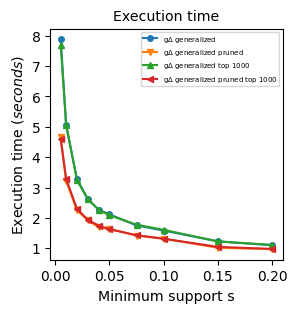

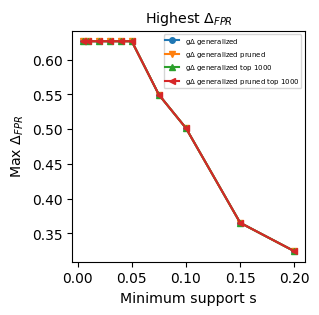

In [9]:


import os
output_fig_dir = os.path.join(os.path.curdir, output_dir, "figures", "output_performance")

if saveFig:


    from pathlib import Path

    Path(output_fig_dir).mkdir(parents=True, exist_ok=True)


abbreviations = {"one_at_time":"indiv t.", \
         "divergence_criterion":"g$\\Delta$", "entropy":"entr"}



color_labels = get_predefined_color_labels(abbreviations)
lines_style = {k:"-" for k in color_labels}
lines_style.update({k:"--" for k in color_labels if( "base" in k and abbreviations["entropy"] in k)})
lines_style.update({k:"-." for k in color_labels if( 'base' in k and abbreviations["divergence_criterion"] in k)})



from utils_plot import plotDicts



info_plot = {}
for sup in sorted(out_time.keys()):
    for type_gen in out_time[sup]:
        if 'base' in type_gen:
            continue
        type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}", abbreviations)
        if type_gen_str not in info_plot:
            info_plot[type_gen_str] = {}
        info_plot[type_gen_str][sup] = out_time[sup][type_gen]


size_fig = (3,3)


info_i = "time"

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")




plotDicts(info_plot, marker=True, \
        title = 'Execution time', sizeFig=size_fig,\
            #    linestyle=lines_style, color_labels=color_labels, \
        xlabel="Minimum support s",  ylabel="Execution time $(seconds)$", labelSize=10.2,\
        outside=False,  saveFig=saveFig, nameFig = figure_name)


# ## Plot max_fpr





info_plot = {}
for sup in sorted(out_support.keys()):
    for type_gen in out_support[sup]:
        if 'base' in type_gen:
            continue
        type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}", abbreviations)
        if type_gen_str not in info_plot:
            info_plot[type_gen_str] = {}
        info_plot[type_gen_str][sup] = out_support[sup][type_gen]


size_fig = (3,3)


info_i = f"max_{metric}"

figure_name = os.path.join(output_fig_dir, f"{dataset_name}_stree_{min_support_tree}_{metric}_{info_i}.pdf")


plotDicts(info_plot, marker=True, \
        title="Highest $\\Delta_{FPR}$" , sizeFig=size_fig,
            # linestyle=lines_style, color_labels=color_labels, \
        xlabel="Minimum support s",  ylabel="Max $\\Delta_{FPR}$", labelSize=10.2,\
        outside=False,  saveFig=saveFig, nameFig = figure_name) #yscale="log",  



# # Store performance results

if save:
    import os

    output_results = os.path.join(os.path.curdir, output_dir, 'performance')
    from pathlib import Path

    Path(output_results).mkdir(parents=True, exist_ok=True)

    conf_name = f"{dataset_name}_{metric}_{type_criterion}_{min_support_tree}"

    import json
    with open(os.path.join(output_results, f'{conf_name}_time.json'), 'w') as output_file:
        output_file.write(json.dumps(out_time))


    import json
    with open(os.path.join(output_results, f'{conf_name}_fp.json'), 'w') as output_file:
        output_file.write(json.dumps(out_fp))


    out_support_max = {}


    for sup in sorted(out_support.keys()):
        out_support_max[sup] = {}
        for type_gen in out_support[sup]:
            out_support_max[sup][type_gen] = out_support[sup][type_gen]

    with open(os.path.join(output_results, f'{conf_name}_div.json'), 'w') as output_file:
        output_file.write(json.dumps(out_support_max))




In [10]:
import pandas as pd

pd.DataFrame(info_plot).T.describe()

,0.005,0.010,0.020,0.030,0.040,0.050,0.075,0.100,0.150,0.200
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.626517,0.626517,0.626517,0.626517,0.626517,0.626517,0.549594,0.501517,0.365336,0.324414
std,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
min,0.626517,0.626517,0.626517,0.626517,0.626517,0.626517,0.549594,0.501517,0.365336,0.324414
25%,0.626517,0.626517,0.626517,0.626517,0.626517,0.626517,0.549594,0.501517,0.365336,0.324414
50%,0.626517,0.626517,0.626517,0.626517,0.626517,0.626517,0.549594,0.501517,0.365336,0.324414
75%,0.626517,0.626517,0.626517,0.626517,0.626517,0.626517,0.549594,0.501517,0.365336,0.324414
max,0.626517,0.626517,0.626517,0.626517,0.626517,0.626517,0.549594,0.501517,0.365336,0.324414


In [23]:

info_plot = {}
for sup in sorted(out_time.keys()):
    for type_gen in out_time[sup]:
        if 'base' in type_gen:
            continue
        if "pruned" in type_gen:
            continue
        type_gen_str = abbreviateValue(f"{type_criterion}_{type_gen}", abbreviations)
        if type_gen_str not in info_plot:
            info_plot[type_gen_str] = {}
        info_plot[type_gen_str][sup] = out_time[sup][type_gen]



        
pd.DataFrame(info_plot).T.describe()

,0.005,0.010,0.020,0.030,0.040,0.050,0.075,0.100,0.150,0.200
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,7.788011,5.059128,3.259035,2.617630,2.268267,2.100610,1.762395,1.593206,1.224766,1.102986
std,0.139842,0.008691,0.026224,0.007412,0.000252,0.020278,0.017289,0.016689,0.000730,0.007631
min,7.689128,5.052983,3.240492,2.612389,2.268089,2.086271,1.750169,1.581405,1.224250,1.097590
25%,7.738570,5.056056,3.249763,2.615009,2.268178,2.093441,1.756282,1.587305,1.224508,1.100288
50%,7.788011,5.059128,3.259035,2.617630,2.268267,2.100610,1.762395,1.593206,1.224766,1.102986
75%,7.837453,5.062201,3.268307,2.620250,2.268356,2.107779,1.768507,1.599106,1.225024,1.105684
max,7.886894,5.065273,3.277579,2.622871,2.268445,2.114949,1.774620,1.605007,1.225282,1.108382


In [7]:
# # Extract patterns



import time

for apply_generalization in [False, True]:
    type_gen = 'generalized' if apply_generalization else 'base'
    print(type_gen)
    for top_k in [None, 1000]:
        top_k_str = '' if top_k is None else f'_top_{top_k}'
        print(top_k_str)
        for keep in [False, True]:
            if keep:
                keep_items = tree_discr.get_keep_items_associated_with_divergence()
                keep_str = "_pruned"
            else:
                keep_items = None
                keep_str = ""
            print(keep_str)
            for min_sup_divergence in min_sup_divergences:
                print(min_sup_divergence, end = " ")
                s_time = time.time()

                if metric == 'd_outcome':
                    from utils_extract_divergence_generalized_ranking import  extract_divergence_generalized

                    FP_fm = extract_divergence_generalized(
                    df_analyze,
                    discretizations,
                    generalization_dict,
                    continuous_attributes,
                    min_sup_divergence=min_sup_divergence,
                    apply_generalization=apply_generalization,
                    target_name=target,
                    metrics_divergence = [metric],
                    FPM_type="fpgrowth",
                    save_in_progress = False, 
                    keep_only_positive_divergent_items=keep_items,
                    
                    )
                else:

                    from utils_extract_divergence_generalized import  extract_divergence_generalized
                    FP_fm = extract_divergence_generalized(
                        df_analyze,
                        discretizations,
                        generalization_dict,
                        continuous_attributes,
                        min_sup_divergence=min_sup_divergence,
                        apply_generalization=apply_generalization,
                        true_class_name=true_class_name,
                        predicted_class_name=pred_class_name,
                        class_map=class_map,
                        metrics_divergence = [metric],
                        FPM_type="fpgrowth",
                        save_in_progress = False, 
                        keep_only_positive_divergent_items=keep_items,
                        take_top_k=top_k
                    )

                key = type_gen + keep_str + top_k_str

                out_time.setdefault(min_sup_divergence, {})[key] = time.time()-s_time

                print(f"({(time.time()-s_time):.2f})")

                most_divergent = max(FP_fm[metric])

                out_support.setdefault(min_sup_divergence, {})[key] = most_divergent

                out_fp.setdefault(min_sup_divergence, {})[key] = len(FP_fm)



base


0.005 1 10000
(2.79)
0.01 (2.23)
0.02 (1.72)
0.03 (1.50)
0.04 (1.47)
0.05 (1.35)
0.075 (1.26)
0.1 (1.18)
0.15 (0.86)
0.2 (0.79)
_pruned
0.005 1 10000
(2.16)
0.01 (1.75)
0.02 (1.42)
0.03 (1.29)
0.04 (1.24)
0.05 (1.20)
0.075 (1.14)
0.1 (1.01)
0.15 (0.83)
0.2 (0.80)
_top_1000

0.005 1 10000
(2.80)
0.01 (2.37)
0.02 (1.83)
0.03 (1.68)
0.04 (1.50)
0.05 (1.37)
0.075 (1.28)
0.1 (1.15)
0.15 (0.86)
0.2 (0.82)
_pruned
0.005 1 10000
(2.14)
0.01 (1.72)
0.02 (1.54)
0.03 (1.36)
0.04 (1.25)
0.05 (1.19)
0.075 (1.05)
0.1 (1.09)
0.15 (0.85)
0.2 (0.82)
generalized


0.005 1 10000
2 20000
3 30000
4 40000
5 50000
(7.89)
0.01 1 10000
2 20000
(5.05)
0.02 1 10000
(3.28)
0.03 (2.62)
0.04 (2.27)
0.05 (2.11)
0.075 (1.75)
0.1 (1.58)
0.15 (1.22)
0.2 (1.10)
_pruned
0.005 1 10000
2 20000
(4.65)
0.01 1 10000
(3.22)
0.02 (2.24)
0.03 (1.93)
0.04 (1.69)
0.05 (1.64)
0.075 (1.42)
0.1 (1.31)
0.15 (1.01)
0.2 (0.97)
_top_1000

0.005 1 10000
2 20000
3 30000
4 40000
5 50000
(7.69)
0.01 1 10000
2 20000
(5.07)
0.02 1 10000

In [11]:
min_sup_divergence = 0.05


FP_fm_a = extract_divergence_generalized(
                        df_analyze,
                        discretizations,
                        generalization_dict,
                        continuous_attributes,
                        min_sup_divergence=min_sup_divergence,
                        apply_generalization=apply_generalization,
                        true_class_name=true_class_name,
                        predicted_class_name=pred_class_name,
                        class_map=class_map,
                        metrics_divergence = [metric],
                        FPM_type="fpgrowth",
                        save_in_progress = False, 
                    )



FP_fm_b = extract_divergence_generalized(
                        df_analyze,
                        discretizations,
                        generalization_dict,
                        continuous_attributes,
                        min_sup_divergence=min_sup_divergence,
                        apply_generalization=apply_generalization,
                        true_class_name=true_class_name,
                        predicted_class_name=pred_class_name,
                        class_map=class_map,
                        metrics_divergence = [metric],
                        FPM_type="fpgrowth",
                        save_in_progress = False, 
                        take_top_k=top_k
                    )

In [18]:
FP_fm_b.sort_values("d_fnr", ascending = False)

,support,itemsets,tn,fp,fn,tp,length,support_count,fnr,d_fnr,t_value_fn
906,0.052541,"(age=<=22, hours-per-week=<=30, marital-status...",2371,3,2,0,3,2376.0,1.000000,0.626517,1.943667
534,0.067865,"(hours-per-week=<=44, age=<=22, relationship=O...",3063,2,4,0,3,3069.0,1.000000,0.626517,3.262736
954,0.051325,"(sex=Male, hours-per-week=<=44, age=<=22)",2310,4,7,0,3,2321.0,1.000000,0.626517,5.180471
848,0.054199,"(age=<=22, hours-per-week=<=30)",2446,3,2,0,2,2451.0,1.000000,0.626517,1.943667
701,0.059860,"(hours-per-week=<=44, race=White, age=<=22, re...",2702,2,3,0,4,2707.0,1.000000,0.626517,2.610711
...,...,...,...,...,...,...,...,...,...,...,...
631,0.062912,"(marital-status=Separated, race=White, sex=Fem...",2575,45,145,80,4,2845.0,0.644444,0.270961,8.412865
675,0.060612,"(workclass=Private, age=[23-27], race=White, m...",2690,6,29,16,4,2741.0,0.644444,0.270961,3.809764
7,0.218500,"(occupation=Blue-Collar, education=High School...",7706,390,1150,635,2,9881.0,0.644258,0.270774,22.161648
314,0.086462,"(age=[23-27], marital-status=Never-Married)",3829,8,47,26,2,3910.0,0.643836,0.270352,4.823512


In [19]:
FP_fm_a.sort_values("d_fnr", ascending = False)

,support,itemsets,tn,fp,fn,tp,length,support_count,fnr,d_fnr,t_value_fn
3025,0.052563,"(workclass=Private, relationship=Own-child, ag...",2373,2,2,0,6,2377.0,1.000000,0.626517,1.943667
2506,0.059219,"(workclass=Private, relationship=Own-child, ag...",2673,2,3,0,5,2678.0,1.000000,0.626517,2.610711
2336,0.061740,"(marital-status=Never-Married, race=White, age...",2788,2,2,0,4,2792.0,1.000000,0.626517,1.943667
3028,0.052541,"(age=<=22, hours-per-week=<=30, marital-status...",2371,3,2,0,3,2376.0,1.000000,0.626517,1.943667
2038,0.066649,"(hours-per-week=<=44, age=<=22, relationship=O...",3009,2,3,0,4,3014.0,1.000000,0.626517,2.610711
...,...,...,...,...,...,...,...,...,...,...,...
3091,0.051944,"(relationship=Husband, race=White, occupation=...",333,327,243,1446,4,2349.0,0.143872,-0.229611,23.660760
3092,0.051944,"(sex=Male, occupation=White-Collar, age=>=36, ...",333,327,243,1446,5,2349.0,0.143872,-0.229611,23.660760
3090,0.051944,"(marital-status=Married, occupation=White-Coll...",333,327,243,1446,5,2349.0,0.143872,-0.229611,23.660760
3093,0.051944,"(marital-status=Married, sex=Male, occupation=...",333,327,243,1446,6,2349.0,0.143872,-0.229611,23.660760
